# Tableau Homework - Citi Bike Analytics

Since 2013, the Citi Bike Program has implemented a robust infrastructure for collecting data on the program's utilization. Through the team's efforts, each month bike data is collected, organized, and made public on the Citi Bike Data [webpage](https://www.citibikenyc.com/system-data)

Task
Your task in this assignment is to aggregate the data found in the Citi Bike Trip History Logs and find two unexpected phenomena.

Design 2-5 visualizations for each discovered phenomena (4-10 total). You may work with a timespan of your choosing. Optionally, you may merge multiple datasets from different periods.

### Import Dependencies

In [1]:
import os
import pandas as pd

### Import and clean the data

In [2]:
directory = os.path.join("data","JC-2018-2020")
filepath = os.path.join(directory,"JC-202011-citibike-tripdata.csv")
print(filepath)

data/JC-2018-2020/JC-202011-citibike-tripdata.csv


In [3]:
# df = pd.read_csv(filepath)

In [4]:
# Get list of files on the directory
files_list = [];
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        files_list.append(os.path.join(filename))

    else:
        continue

In [5]:
df_merged = pd.DataFrame({'A' : []})

In [6]:
n = 0
for file in files_list:
    if n == 0:
        filepath = os.path.join(directory,file)
        df_merged = pd.read_csv(filepath)
    else:
        filepath = os.path.join(directory,file)
        df = pd.read_csv(filepath)
        df_merged = pd.merge(df, df_merged, how='outer')
    
    n += 1

In [7]:
df_merged

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,756,2020-11-01 00:11:32.6250,2020-11-01 00:24:09.5850,3275,Columbus Drive,40.718355,-74.038914,3225,Baldwin at Montgomery,40.723659,-74.064194,42436,Subscriber,1984.0,1
1,584,2020-11-01 00:14:20.4820,2020-11-01 00:24:04.7820,3681,Grand St,40.715178,-74.037683,3209,Brunswick St,40.724176,-74.050656,46532,Customer,1969.0,0
2,403,2020-11-01 00:22:55.8820,2020-11-01 00:29:39.0950,3203,Hamilton Park,40.727596,-74.044247,3483,Montgomery St,40.719420,-74.050990,35139,Subscriber,1980.0,1
3,498,2020-11-01 00:41:37.4270,2020-11-01 00:49:55.7010,3268,Lafayette Park,40.713464,-74.062859,3213,Van Vorst Park,40.718489,-74.047727,46539,Customer,1969.0,0
4,151,2020-11-01 00:53:21.2340,2020-11-01 00:55:52.8060,3185,City Hall,40.717733,-74.043845,3276,Marin Light Rail,40.714584,-74.042817,44388,Subscriber,1986.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086389,972,2017-12-31 21:54:12,2017-12-31 22:10:25,3191,Union St,40.718211,-74.083639,3186,Grove St PATH,40.719586,-74.043117,29644,Subscriber,1987.0,2
1086390,382,2017-12-31 22:10:18,2017-12-31 22:16:41,3280,Astor Place,40.719282,-74.071262,3268,Lafayette Park,40.713464,-74.062859,31799,Subscriber,1994.0,1
1086391,93,2017-12-31 22:55:10,2017-12-31 22:56:43,3186,Grove St PATH,40.719586,-74.043117,3185,City Hall,40.717733,-74.043845,31920,Subscriber,1957.0,1
1086392,186,2017-12-31 23:20:54,2017-12-31 23:24:00,3270,Jersey & 6th St,40.725289,-74.045572,3211,Newark Ave,40.721525,-74.046305,31925,Subscriber,1964.0,1


In [8]:
df_merged.isnull().sum()

tripduration                 0
starttime                    0
stoptime                     0
start station id             0
start station name           0
start station latitude       0
start station longitude      0
end station id               0
end station name             0
end station latitude         0
end station longitude        0
bikeid                       0
usertype                     0
birth year                 450
gender                       0
dtype: int64

In [9]:
df_merged.isnull().values.any()

True

In [10]:
# df_merged.to_csv(os.path.join(directory,"JC-2017-2020-merged.csv"))

In [11]:
nanlist = df_merged[df_merged['starttime'].isnull()]
nanlist

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender


In [12]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df_merged['starttime'])  
    
bool_series.describe()

count     1086394
unique          1
top         False
freq      1086394
Name: starttime, dtype: object

### Analytics

* How many trips have been recorded total during the chosen period?

In [13]:
# How many trips have been recorded total during the chosen period?
total_trips = df_merged['tripduration'].count()
print(f"How many trips have been recorded total during the chosen period? \nR:{total_trips}")

How many trips have been recorded total during the chosen period? 
R:1086394


<hr style="border-top: 3px solid gray;">

* By what percentage has total ridership grown?

In [14]:
df_merged.index = pd.to_datetime(df_merged['starttime'],format='%Y-%m-%d')
df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year])
# df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year, df_merged.index.month])

In [15]:
df_grouped_year = df_grouped_starttime.count()
df_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2017,15898,15898,15898,15898,15898,15898,15898,15898,15898,15898,15898,15898,15898,15448,15898
2018,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892,353892
2019,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947,404947
2020,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657,311657


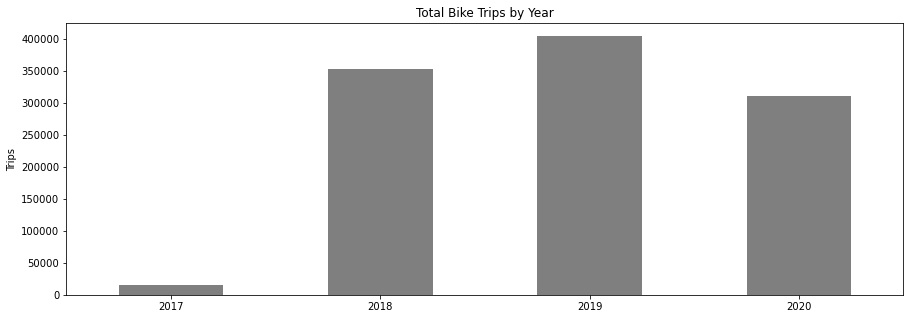

In [16]:
ax = df_grouped_year['tripduration'].plot(kind="bar",color="black", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Total Bike Trips by Year");

In [17]:
growth_2019 = df_grouped_year['tripduration'].iloc[1] / df_grouped_year['tripduration'].iloc[0]
growth_2020 = df_grouped_year['tripduration'].iloc[2] / df_grouped_year['tripduration'].iloc[1]

In [18]:
print(f"Growth 2019: {round(growth_2019*100)}%")
print(f"Growth 2020*: {round(growth_2020*100)}%")
print("\n* for 2020 still missing December")

Growth 2019: 2226%
Growth 2020*: 114%

* for 2020 still missing December


<hr style="border-top: 3px solid gray;">

* How has the proportion of short-term customers and annual subscribers changed?

In [19]:
df_Subscriber = df_merged.loc[df_merged['usertype'] == 'Subscriber']
df_Subscriber_grouped_year = df_Subscriber.groupby(by=[ df_Subscriber.index.year]).count()
df_Subscriber_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2017,15673,15673,15673,15673,15673,15673,15673,15673,15673,15673,15673,15673,15673,15421,15673
2018,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725,331725
2019,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921,361921
2020,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965,212965


<AxesSubplot:xlabel='starttime'>

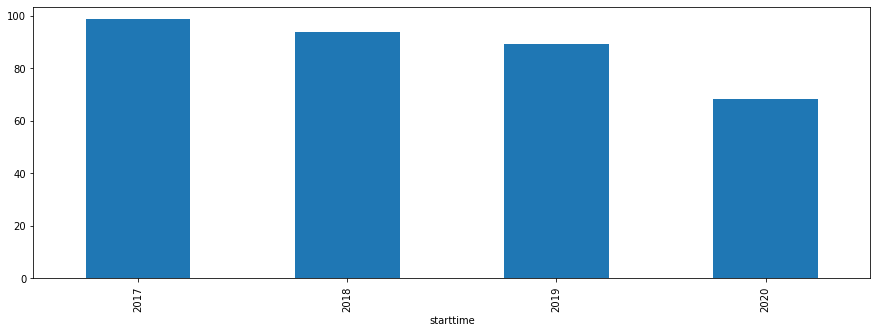

In [20]:
subscriber_to_total = 100*df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration']
subscriber_to_total.plot(kind='bar',figsize=(15, 5))

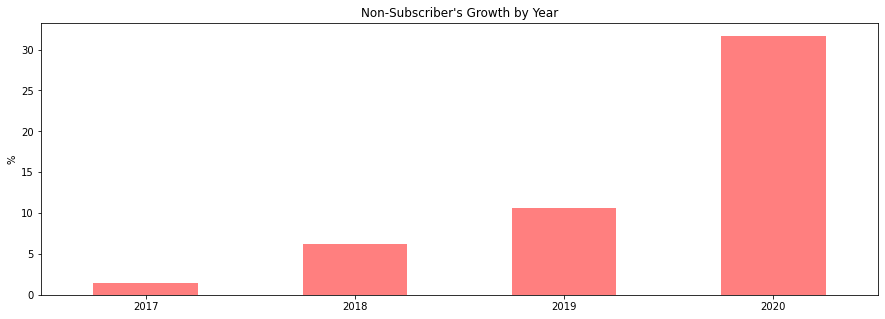

In [21]:
customer_to_total = 100*(1-df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration'])
ax = customer_to_total.plot(kind='bar',color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("%");
ax.set_title("Non-Subscriber's Growth by Year");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during summer months?

In [22]:
# summer (June, July, August)
df_resampled_year = df_merged['starttime'].resample('Y')
df_resampled_year


In [23]:
df_resampled_year.count()

starttime
2017-12-31     15898
2018-12-31    353892
2019-12-31    404947
2020-12-31    311657
Freq: A-DEC, Name: starttime, dtype: int64

In [24]:
df_resampled_by_hour = df_merged['starttime'].resample('H').count()

In [25]:
df_resampled_by_hour

starttime
2017-12-01 00:00:00     5
2017-12-01 01:00:00     0
2017-12-01 02:00:00     2
2017-12-01 03:00:00     2
2017-12-01 04:00:00     7
                       ..
2020-11-30 19:00:00    25
2020-11-30 20:00:00    12
2020-11-30 21:00:00    14
2020-11-30 22:00:00     8
2020-11-30 23:00:00     5
Freq: H, Name: starttime, Length: 26304, dtype: int64

In [26]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-06-01")]

In [27]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour_summer_2018.loc[(df_resampled_by_hour_summer_2018.index < "2018-09-01")]

In [28]:
df_summer_2018 = pd.DataFrame(df_resampled_by_hour_summer_2018.resample('H').sum())

<AxesSubplot:xlabel='starttime'>

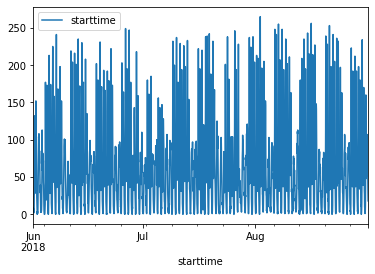

In [29]:
df_summer_2018.plot()

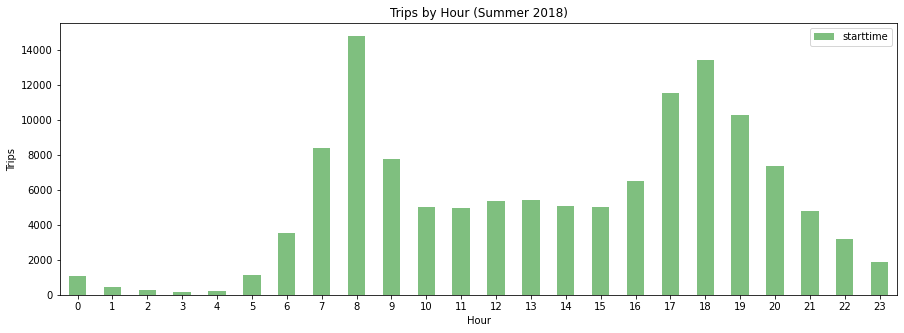

In [30]:
ax = df_summer_2018.groupby(by=[ df_summer_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2018)");

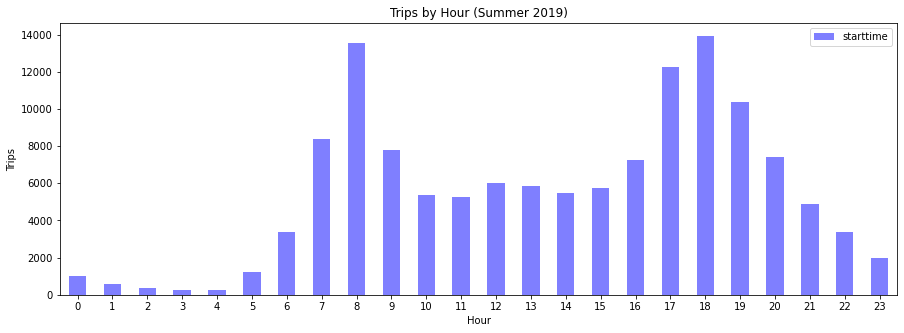

In [31]:
df_resampled_by_hour_summer_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-06-01")]
df_resampled_by_hour_summer_2019 = df_resampled_by_hour_summer_2019.loc[(df_resampled_by_hour_summer_2019.index < "2019-09-01")]
df_summer_2019 = pd.DataFrame(df_resampled_by_hour_summer_2019.resample('H').sum())
ax = df_summer_2019.groupby(by=[ df_summer_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2019)");

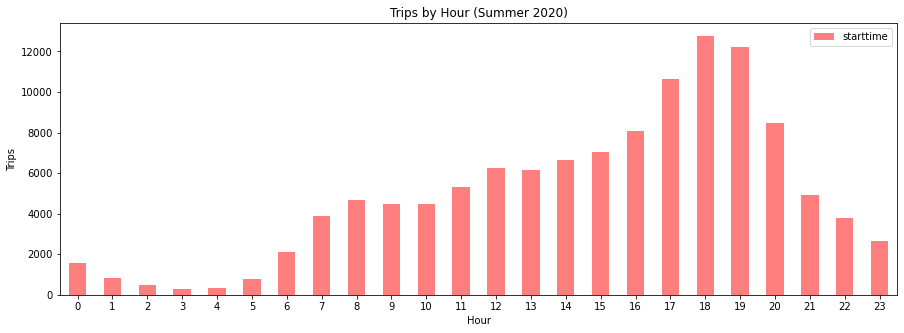

In [32]:
df_resampled_by_hour_summer_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-06-01")]
df_resampled_by_hour_summer_2020 = df_resampled_by_hour_summer_2020.loc[(df_resampled_by_hour_summer_2020.index < "2020-09-01")]
df_summer_2020 = pd.DataFrame(df_resampled_by_hour_summer_2020.resample('H').sum())
ax = df_summer_2020.groupby(by=[ df_summer_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2020)");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during winter months?

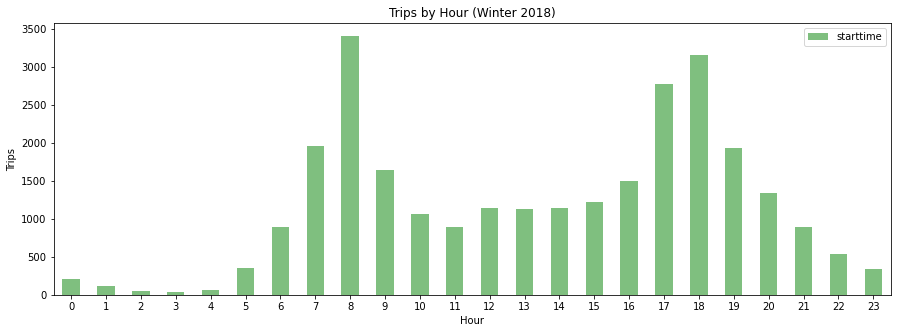

In [33]:
df_resampled_by_hour_winter_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-01-01")]
df_resampled_by_hour_winter_2018 = df_resampled_by_hour_winter_2018.loc[(df_resampled_by_hour_winter_2018.index < "2018-03-01")]
df_winter_2018 = pd.DataFrame(df_resampled_by_hour_winter_2018.resample('H').sum())
ax = df_winter_2018.groupby(by=[ df_winter_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2018)");

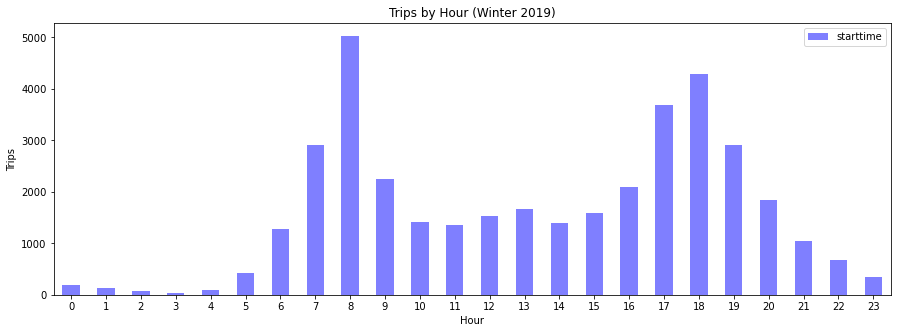

In [34]:
df_resampled_by_hour_winter_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-01-01")]
df_resampled_by_hour_winter_2019 = df_resampled_by_hour_winter_2019.loc[(df_resampled_by_hour_winter_2019.index < "2019-03-01")]
df_winter_2019 = pd.DataFrame(df_resampled_by_hour_winter_2019.resample('H').sum())
ax = df_winter_2019.groupby(by=[ df_winter_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2019)");

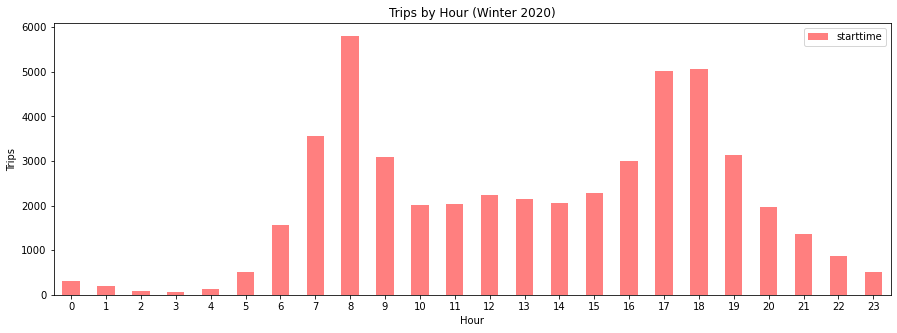

In [35]:
df_resampled_by_hour_winter_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-01-01")]
df_resampled_by_hour_winter_2020 = df_resampled_by_hour_winter_2020.loc[(df_resampled_by_hour_winter_2020.index < "2020-03-01")]
df_winter_2020 = pd.DataFrame(df_resampled_by_hour_winter_2020.resample('H').sum())
ax = df_winter_2020.groupby(by=[ df_winter_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2020)");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for starting a journey? (Based on data, why do you hypothesize these are the top locations?)

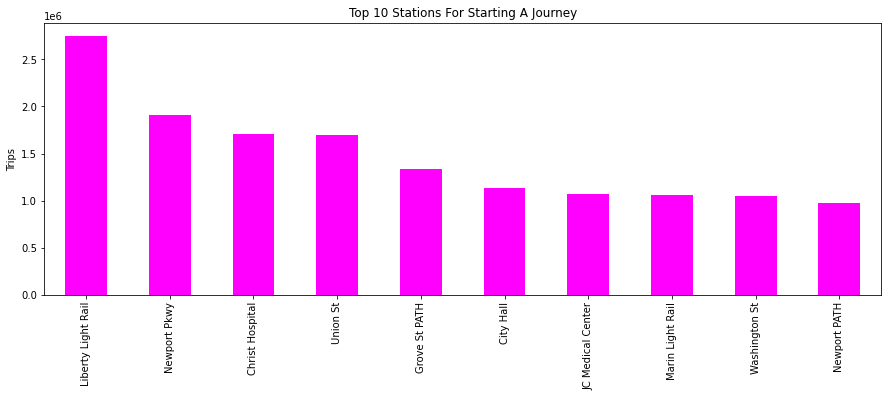

In [36]:
top10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_start_stations['tripduration'].plot(kind="bar", color="fuchsia", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)

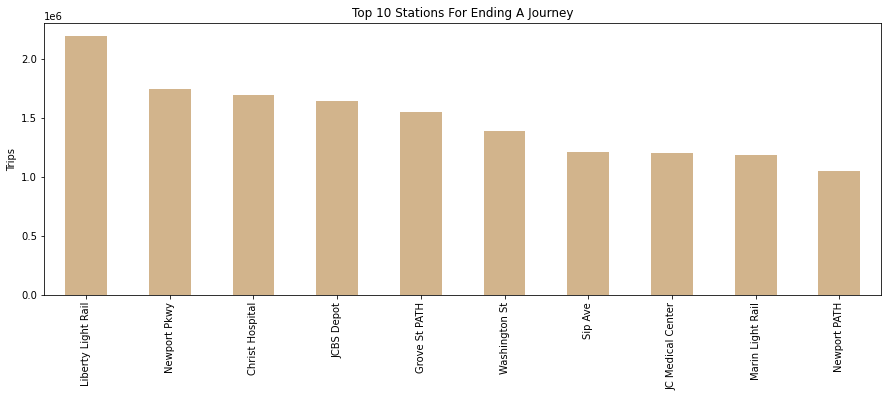

In [37]:
top10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_ending_stations['tripduration'].plot(kind="bar", color="tan", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)

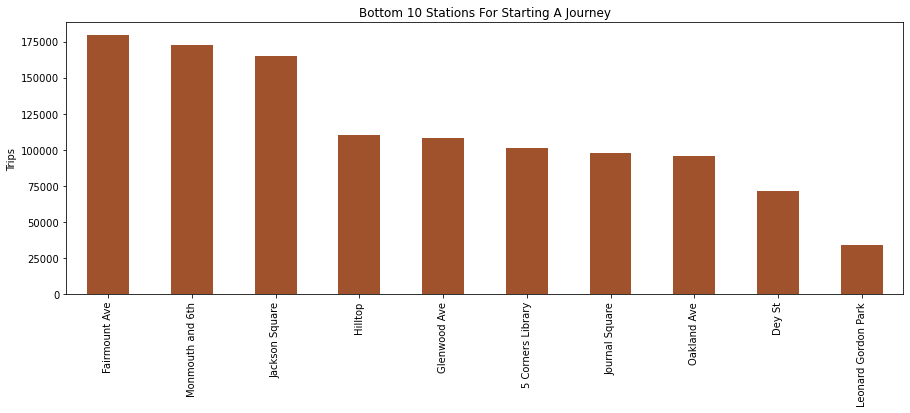

In [38]:
bottom10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_start_stations['tripduration'].plot(kind="bar", color="sienna", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)

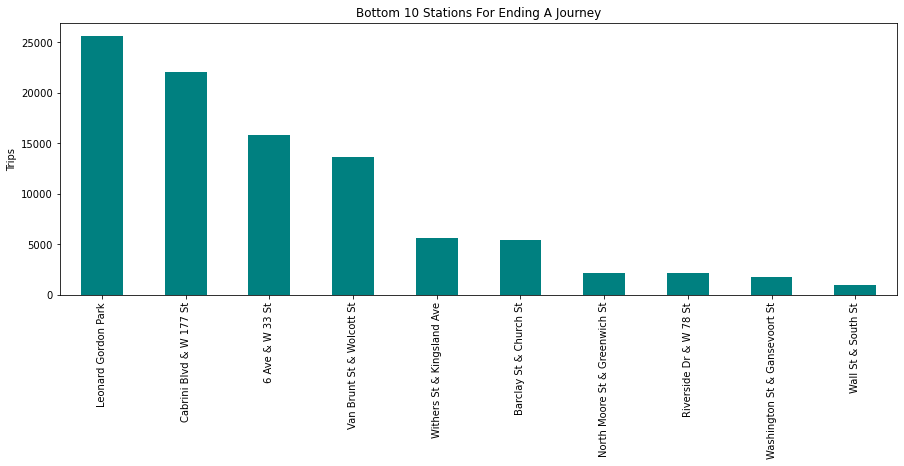

In [39]:
bottom10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_ending_stations['tripduration'].plot(kind="bar", color="teal", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what is the gender breakdown of active participants (Male v. Female)?

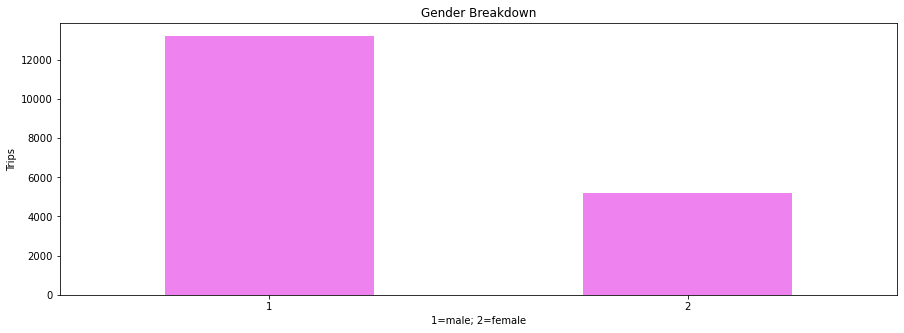

In [40]:
gender_breakdown = df_merged.loc[(df_merged.index >= "2020-11-01") & (df_merged.gender != 0)].groupby("gender")
ax = gender_breakdown['tripduration'].count().plot(kind="bar", rot=0,color="violet", alpha=1,figsize=(15, 5))
ax.set_xlabel("1=male; 2=female");
ax.set_ylabel("Trips");
ax.set_title("Gender Breakdown");

<hr style="border-top: 3px solid gray;">

* How effective has gender outreach been in increasing female ridership over the timespan?

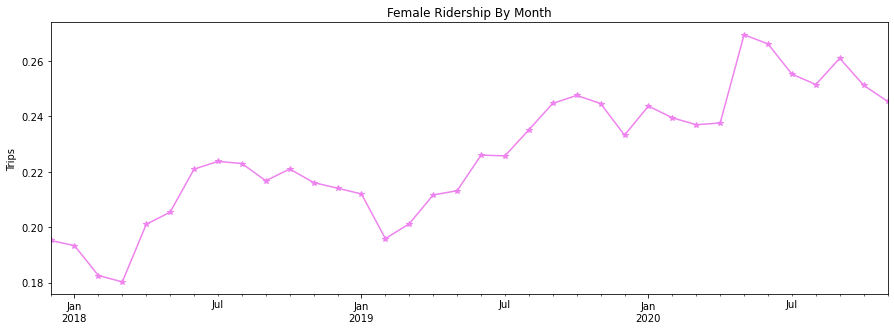

In [41]:
female_ridership_by_month = df_merged['tripduration'].loc[(df_merged.gender == 2)].resample("M").count() / df_merged['tripduration'].resample("M").count()
ax = female_ridership_by_month.plot(color="violet",marker='*', alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Female Ridership By Month");

<hr style="border-top: 3px solid gray;">

* How does the average trip duration change by age?

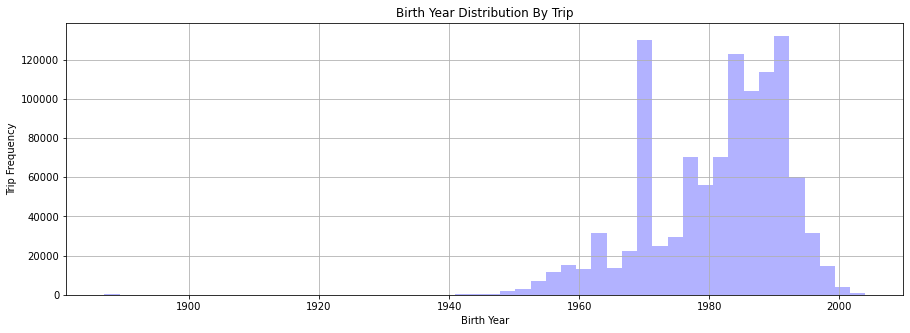

In [42]:
ax = df_merged['birth year'].hist(bins=50,color="b", alpha=.3,figsize=(15, 5))
ax.set_xlabel("Birth Year");
ax.set_ylabel("Trip Frequency");
ax.set_title("Birth Year Distribution By Trip");

In [43]:
df_grouped_age = df_merged.groupby("birth year")

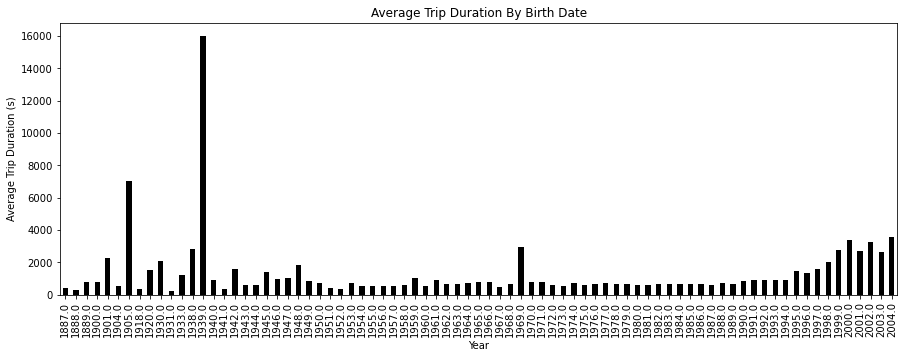

In [44]:
ax = df_grouped_age['tripduration'].mean().plot(kind="bar",color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("Year");
ax.set_ylabel("Average Trip Duration (s)");
ax.set_title("Average Trip Duration By Birth Date");

In [45]:
df_grouped_age_usertype = df_merged.groupby(["birth year","usertype"]).count()

In [46]:
df_grouped_age_usertype

tripduration  starttime  stoptime  start station id  \
birth year usertype                                                          
1887.0     Subscriber            23         23        23                23   
1888.0     Customer               2          2         2                 2   
           Subscriber           258        258       258               258   
1889.0     Customer               4          4         4                 4   
1900.0     Customer               2          2         2                 2   
...                             ...        ...       ...               ...   
2002.0     Customer             582        582       582               582   
           Subscriber            47         47        47                47   
2003.0     Customer             179        179       179               179   
           Subscriber            74         74        74                74   
2004.0     Customer              25         25        25                25   

                       start station name  start station latitude  \
birth year usertype                                                 
1887.0     Subscriber                  23                      23   
1888.0     Customer                     2                       2   
           Subscriber                 258                     258   
1889.0     Customer                     4                       4   
1900.0     Customer                     2                       2   
...                                   ...                     ...   
2002.0     Customer                   582                     582   
           Subscriber                  47                      47   
2003.0     Customer                   179                     179   
           Subscriber                  74                      74   
2004.0     Customer                    25                      25   

                       start station longitude  end station id  \
birth year usertype                                              
1887.0     Subscriber                       23              23   
1888.0     Customer                          2               2   
           Subscriber                      258             258   
1889.0     Customer                          4               4   
1900.0     Customer                          2               2   
...                                        ...             ...   
2002.0     Customer                        582             582   
           Subscriber                       47              47   
2003.0     Customer                        179             179   
           Subscriber                       74              74   
2004.0     Customer                         25              25   

                       end station name  end station latitude  \
birth year usertype                                             
1887.0     Subscriber                23                    23   
1888.0     Customer                   2                     2   
           Subscriber               258                   258   
1889.0     Customer                   4                     4   
1900.0     Customer                   2                     2   
...                                 ...                   ...   
2002.0     Customer                 582                   582   
           Subscriber                47                    47   
2003.0     Customer                 179                   179   
           Subscriber                74                    74   
2004.0     Customer                  25                    25   

                       end station longitude  bikeid  gender  
birth year usertype                                           
1887.0     Subscriber                     23      23      23  
1888.0     Customer                        2       2       2  
           Subscriber                    258     258     258  
1889.0     Customer                        4       4       4  
1900.0     Customer        

<hr style="border-top: 3px solid gray;">

* What is the average distance in miles that a bike is ridden?

In [47]:
from geopy.distance import geodesic

origin = (df_merged['start station latitude'].iloc[0], df_merged['start station longitude'].iloc[0])
dist = (df_merged['end station latitude'].iloc[0], df_merged['end station longitude'].iloc[0])
print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")

Distance is 1.38 miles


In [48]:
list_distances = []
for index in range(len(df_merged.index)):
    origin = (df_merged['start station latitude'].iloc[index], df_merged['start station longitude'].iloc[index])
    dist = (df_merged['end station latitude'].iloc[index], df_merged['end station longitude'].iloc[index])
#     print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")
    list_distances.append(round(100*geodesic(origin, dist).miles)/100)

In [49]:
average_distance = sum(list_distances)/len(list_distances)

In [50]:
average_distance

0.6240099632374174

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

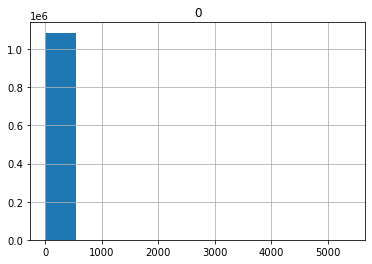

In [51]:
pd.DataFrame(list_distances).hist()

<hr style="border-top: 3px solid gray;">

* Which bikes (by ID) are most likely due for repair or inspection in the timespan?

In [52]:
df_groupby = df_merged.groupby("bikeid")

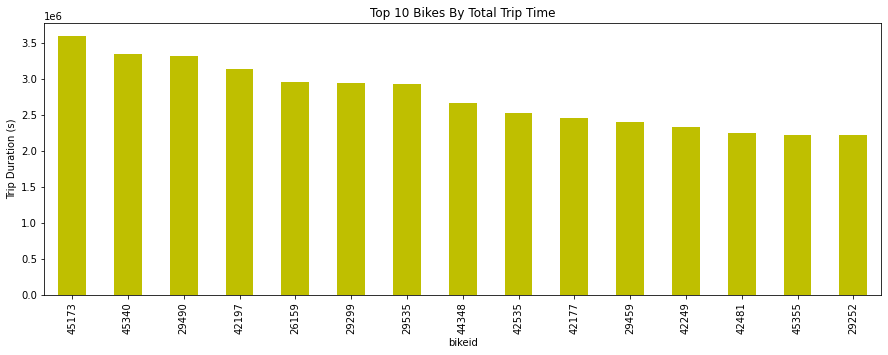

In [53]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=False).head(15).plot(kind="bar", color="y", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Top 10 Bikes By Total Trip Time");

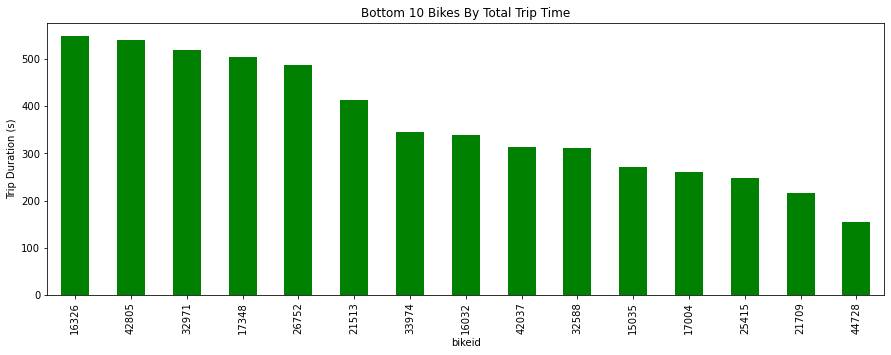

In [54]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=True).head(15).sort_values(ascending=False).plot(kind="bar", color="g", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Bottom 10 Bikes By Total Trip Time");

<hr style="border-top: 3px solid gray;">

* How variable is the utilization by bike ID?

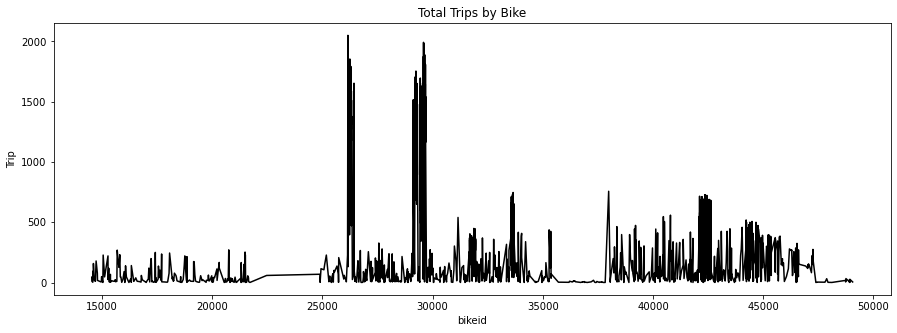

In [55]:
ax = df_groupby['tripduration'].count().plot(color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip");
ax.set_title("Total Trips by Bike");

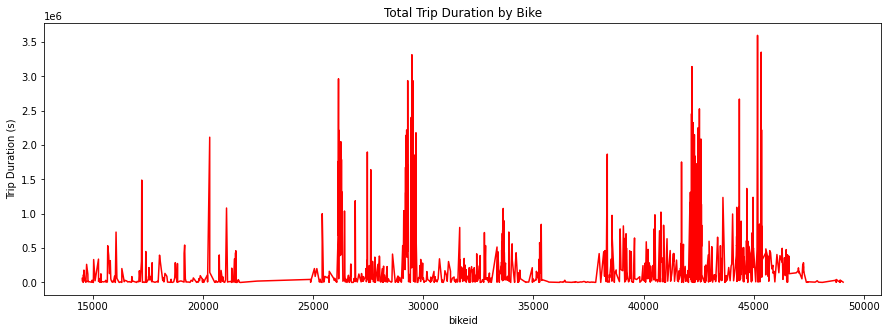

In [56]:
ax = df_groupby['tripduration'].sum().plot(color="r", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Total Trip Duration by Bike");

<hr style="border-top: 3px solid gray;">